In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heartdisease.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
## Null check
df.isnull().sum().sum()

645

In [5]:
## Filing the Nan values
df.fillna(0,inplace = True)

In [6]:
df.isnull().sum().sum()

0

In [7]:
shuffle_df = df.sample(frac = 1)

In [8]:
shuffle_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
268,1,41,2.0,0,0.0,0.0,0,0,0,245.0,134.0,98.0,24.26,85.0,78.0,0
4103,0,51,2.0,0,0.0,0.0,0,1,0,238.0,123.0,80.0,22.19,80.0,100.0,0
1797,0,40,4.0,1,3.0,0.0,0,0,0,188.0,105.0,65.0,21.15,58.0,70.0,0
2055,0,52,1.0,0,0.0,0.0,0,0,0,210.0,146.5,82.0,32.27,85.0,72.0,0
2623,0,43,2.0,0,0.0,0.0,0,0,0,308.0,110.0,70.0,24.83,55.0,83.0,0


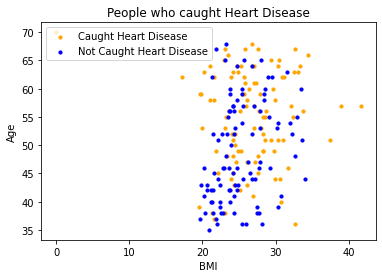

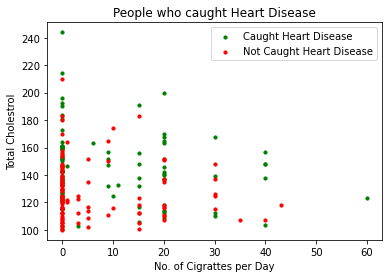

In [9]:
## Visualising our data
Y = shuffle_df.iloc[:,-1]
caught_disease = shuffle_df.loc[Y==1]
not_caught_disease = shuffle_df.loc[Y==0]

plt.ylabel('Age')
plt.xlabel('BMI')
plt.title('People who caught Heart Disease')
plt.scatter(caught_disease.iloc[:100,12],caught_disease.iloc[:100,1] , s = 10 , c = 'orange' , label = 'Caught Heart Disease')
plt.scatter(not_caught_disease.iloc[:100,12],not_caught_disease.iloc[:100,1] , s = 10 , c = 'blue' , label = 'Not Caught Heart Disease')
plt.legend()
plt.show()

plt.ylabel('Total Cholestrol')
plt.xlabel('No. of Cigrattes per Day')
plt.title('People who caught Heart Disease')
plt.scatter(caught_disease.iloc[:100,4],caught_disease.iloc[:100,10] , s = 10 , c = 'green' , label = 'Caught Heart Disease')
plt.scatter(not_caught_disease.iloc[:100,4],not_caught_disease.iloc[:100,10] , s = 10 , c = 'red' , label = 'Not Caught Heart Disease')
plt.legend()
plt.show()

In [10]:
y = shuffle_df.iloc[:,-1].values.reshape(-1,1)
x = shuffle_df.iloc[:,:-1].values.reshape(-1,15)

train_size = int(0.7* len(shuffle_df))

In [11]:
## Splitting dataset into train and test
X_train , X_test , y_train , y_test = x[:train_size] , x[train_size:] , y[:train_size] , y[train_size:]

In [12]:
X_train

array([[  1.  ,  41.  ,   2.  , ...,  24.26,  85.  ,  78.  ],
       [  0.  ,  51.  ,   2.  , ...,  22.19,  80.  , 100.  ],
       [  0.  ,  40.  ,   4.  , ...,  21.15,  58.  ,  70.  ],
       ...,
       [  0.  ,  46.  ,   1.  , ...,  22.72,  82.  ,  74.  ],
       [  0.  ,  52.  ,   4.  , ...,  24.8 ,  74.  ,  77.  ],
       [  0.  ,  59.  ,   1.  , ...,  18.43,  80.  , 107.  ]])

In [13]:
## Preping our data
ones = np.ones([X_train.shape[0],1])
X_train = np.concatenate((ones,X_train),axis=1)
theta = np.zeros([1,X_train.shape[1]])


In [14]:
X_train

array([[  1.  ,   1.  ,  41.  , ...,  24.26,  85.  ,  78.  ],
       [  1.  ,   0.  ,  51.  , ...,  22.19,  80.  , 100.  ],
       [  1.  ,   0.  ,  40.  , ...,  21.15,  58.  ,  70.  ],
       ...,
       [  1.  ,   0.  ,  46.  , ...,  22.72,  82.  ,  74.  ],
       [  1.  ,   0.  ,  52.  , ...,  24.8 ,  74.  ,  77.  ],
       [  1.  ,   0.  ,  59.  , ...,  18.43,  80.  , 107.  ]])

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [16]:
def compute_cost(X, y, theta):
    m = len(y)
    
    h = sigmoid(X @ theta.T)
    epsilon = 1e-5
    cost = 1/m * np.sum((-y).T @ np.log(sigmoid(X @ theta.T)) - (1-y).T @ np.log(1 - sigmoid(X @ theta.T )))
    return cost

In [17]:
def gradient_descent(X, y, theta, alpha, iters):
    m = len(y)
    
    costing = np.zeros((iters,1))

    for i in range(iters):
        ALPHA = sigmoid(X @theta.T)
        BETA = (ALPHA - y).T
        SIGMA = alpha/m * (BETA @ X)
        theta = theta - SIGMA
        costing[i] = compute_cost(X, y, theta)

    return theta , costing

In [18]:
def predict(X, theta):
    return np.round(sigmoid(X @ theta.T))

In [19]:


alpha = 0.03
iters = 1000

initial_cost = compute_cost(X_train, y_train, theta)




In [ ]:
THETA , costing = gradient_descent(X_train, y_train, theta, alpha, iters)

y_pred = predict(X_train, THETA)
score = float(sum(y_pred == y_train))/ float(len(y_train))

In [21]:
print(f"The ACcuracy of the model is {score}")

The ACcuracy of the model is 0.8465947403910992


In [22]:
## Predict Values
Final = X_train @ THETA.T

In [23]:
## Our Bias
Bias = Final.mean()

In [24]:
## Testing For new Values
ones = np.ones([X_test.shape[0],1])
X_test = np.concatenate((ones,X_test),axis=1)

NEW = X_test @ THETA.T
ANS = []
for i in NEW:
    if i >= Bias:
        ANS.append('ON RISK')
    else:
        ANS.append('NOT ON RISK')
ANS

['NOT ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'ON RISK',
 'ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'ON RISK',
 'ON RISK',
 'ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'ON RISK',
 'ON RISK',
 'ON RISK',
 'ON RISK',
 'ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON